SUAVISADO DE PUNTO DE INTERES

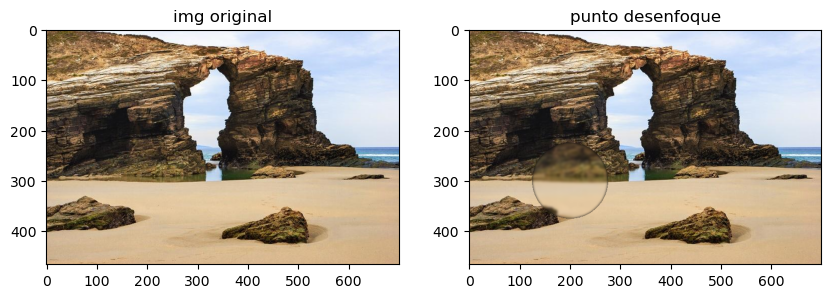

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def desenfoquePDT(img, centro, x, y):
    img1 = np.copy(img)
    valx,valy = centro
    mediax = x//2
    mediaY = y//2
    mascara = np.zeros_like(img, dtype=np.uint8)
    cv2.ellipse(mascara,(valx,valy),(mediax,mediaY),0,0,360,(255,255,255),-1)
    img_mask = cv2.bitwise_and(img,mascara)
    desenmfoque = cv2.GaussianBlur(img_mask,(15,15),0)
    img1[mascara!=0] = desenmfoque[mascara!=0]
    return img1

img = cv2.imread('2.png')
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_desenfoque = desenfoquePDT(imgRGB,(200,300),150,150)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('img original')
plt.imshow(imgRGB, cmap='gray')

plt.subplot(1,2,2)
plt.title('punto desenfoque')
plt.imshow(img_desenfoque, cmap='gray')

plt.show()

BORDES Y MASCARAS

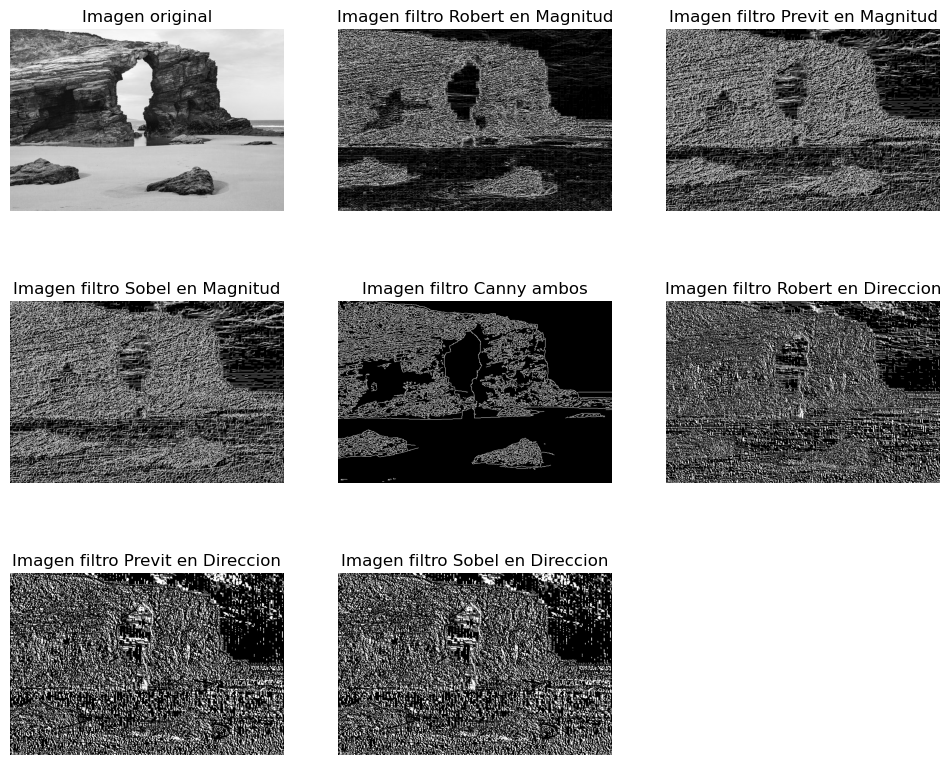

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('2.png')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#Kernel Robert
robertx = np.array([(-1, 0),(0, 1)]) 
roberty = np.array([(0, -1),(1, 0)])
#Mostrar en x,y
img_robx = cv2.filter2D(img_gray, -1, robertx) 
img_roby = cv2.filter2D(img_gray, -1, roberty)
#Magnitud de Robert
rbg_gMagnitud = np.sqrt(img_robx ** 2 + img_roby ** 2)
rgb_gDireecion = np.arctan2(img_roby, img_robx)  #Simulando un filtro Previtt

#Filtro Previtt
#Kernels
previttx = np.array([(1, 0, -1),(1, 0, -1),(1, 0, -1)]) 
previtty = np.array([(1, 1, 1),(0, 0, 0),(-1, -1, -1)]) 

img_prevx = cv2.filter2D(img_gray, -1, previttx)
img_prevy = cv2.filter2D(img_gray, -1, previtty)

prev_mag = np.sqrt(img_prevx ** 2 + img_prevy ** 2)
prev_dir = np.arctan2(img_prevx , img_prevy)

#Filtro Sobet
#Kerner Sobet
sobetx = np.array([(1, 0, -1),(2, 0, -2),(1, 0, -1)]) 
sobety = np.array([(1, 2, 1),(0, 0, 0),(-1, -2, -1)]) 

img_sobx = cv2.filter2D(img_gray, -1, sobetx)
img_soby = cv2.filter2D(img_gray, -1, sobety)

sobel_gradiente = np.sqrt(img_sobx ** 2 + img_soby ** 2)
sobel_dire = np.arctan2(img_sobx, img_soby)


#Filtro Canny
canny = cv2.Canny(img_gray, 100, 200)

plt.figure(figsize=(12,10))

plt.subplot(3, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(rbg_gMagnitud, cmap='gray')
plt.title('Imagen filtro Robert en Magnitud')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(prev_mag, cmap='gray')
plt.title('Imagen filtro Previt en Magnitud')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(sobel_gradiente, cmap='gray')
plt.title('Imagen filtro Sobel en Magnitud')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(canny, cmap='gray')
plt.title('Imagen filtro Canny ambos')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(rgb_gDireecion, cmap='gray')
plt.title('Imagen filtro Robert en Direccion')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(prev_dir, cmap='gray')
plt.title('Imagen filtro Previt en Direccion')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(sobel_dire, cmap='gray')
plt.title('Imagen filtro Sobel en Direccion')
plt.axis('off')


plt.show()

ROBERTS

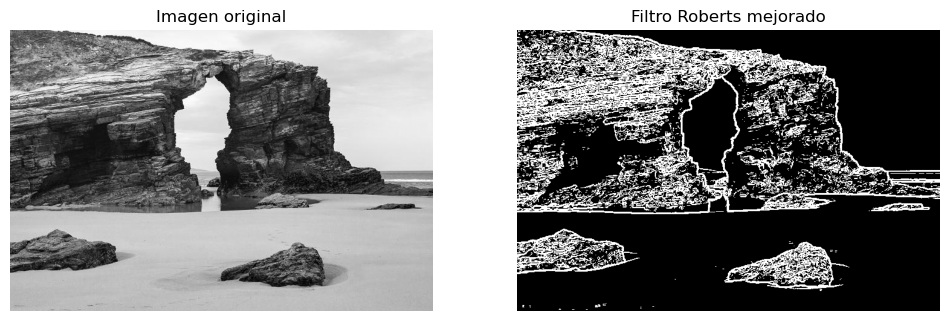

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def roberts_mejorada(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    suavido = cv2.GaussianBlur(img_gray, (3, 3), 0)  # Quitar Ruido

    kernelx = np.array([[2, 0], [0, -2]], dtype=np.float32)
    kernely = np.array([[0, 2], [-2, 0]], dtype=np.float32)

    robrx = cv2.filter2D(suavido, cv2.CV_16S, kernelx)
    robrt = cv2.filter2D(suavido, cv2.CV_16S, kernely)

    robert2 = cv2.addWeighted(np.abs(robrx), 0.7, np.abs(robrt), 0.7, 0)

    _, bordes = cv2.threshold(robert2, 30, 255, cv2.THRESH_BINARY)
    return bordes


img = cv2.imread('2.png')
imagen_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


imgen = roberts_mejorada(img)

plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
plt.imshow(imagen_gray, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imgen, cmap='gray')
plt.title('Filtro Roberts mejorado')
plt.axis('off')

plt.show()


SOBET MEJORADA

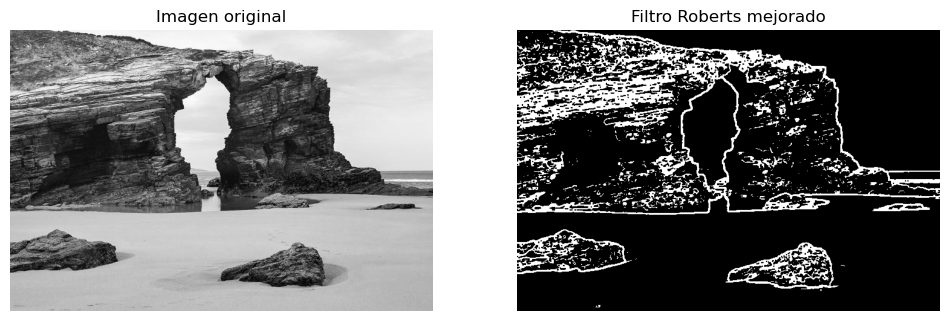

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sobel_mejorada(imagen, tm_kernel=3, umbral = 10):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (3, 3), 0)  # Quitar Ruido

    sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize = tm_kernel)
    sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize = tm_kernel)

    magnitud = np.sqrt(sobelx ** 2 + sobely ** 2)
    magnitud = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    _,bordes = cv2.threshold(magnitud, umbral, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # Mas precisicon agregar OTSU
    #Unir bordes Notus

    kernel_mor = np.ones((2, 2), np.uint8)
    bordes = cv2.morphologyEx(bordes, cv2.MORPH_CLOSE, kernel_mor)
    return bordes


img = cv2.imread('2.png')
imagen_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

imgen = sobel_mejorada(img)

plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
plt.imshow(imagen_gray, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imgen, cmap='gray')
plt.title('Filtro Roberts mejorado')
plt.axis('off')

plt.show()




PREVIT MEJORADO

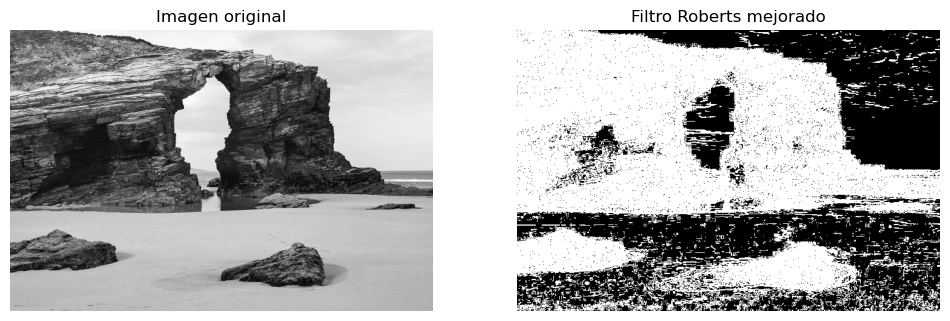

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def previt_mejorada(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (3, 3), 0)  # Quitar Ruido

    previtx = np.array([(3, 0, -3),(3, 0, -3),(3, 0, -3)],dtype = np.float32)
    previty = np.array([(3, 3, 3),(0, 0, 0),(-3, -3, -3)],dtype = np.float32)

    x = cv2.filter2D(imagen_gray, cv2.CV_64F , previtx)
    y = cv2.filter2D(imagen_gray, cv2.CV_64F , previty)

    magnitud = np.sqrt(x ** 2 + y ** 2)

    _,bordes = cv2.threshold(magnitud, 30, 255, cv2.THRESH_BINARY)

    return bordes

img = cv2.imread('2.png')
imagen_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

imgen = previt_mejorada(img)

plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
plt.imshow(imagen_gray, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imgen, cmap='gray')
plt.title('Filtro Roberts mejorado')
plt.axis('off')

plt.show()




<Figure size 1500x1000 with 0 Axes>

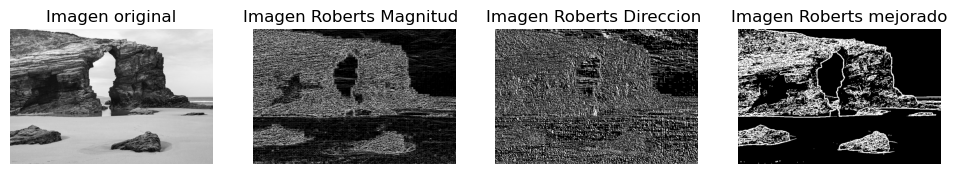

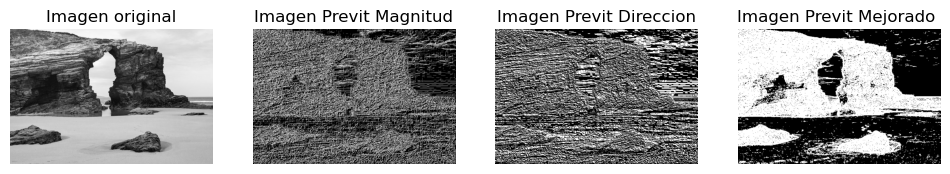

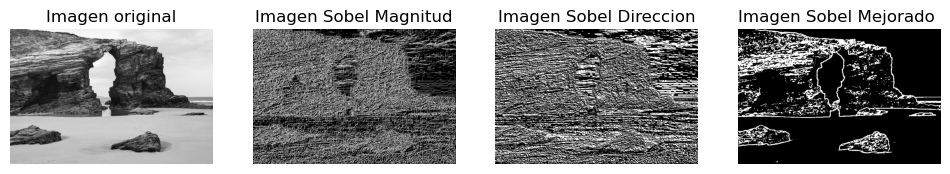

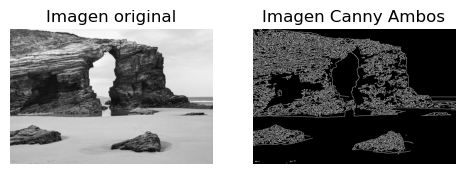

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def robert_natural(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    robertx = np.array([[-1, 0], [0, 1]])
    roberty = np.array([[0, -1], [1, 0]])

    img_robx = cv2.filter2D(img_gray, -1, robertx)
    img_roby = cv2.filter2D(img_gray, -1, roberty)

    rbg_gMagnitud = np.sqrt(img_robx ** 2 + img_roby ** 2)
    rgb_gDireccion = np.arctan2(img_roby, img_robx)

    return rbg_gMagnitud, rgb_gDireccion


def roberts_mejorada(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    suavido = cv2.GaussianBlur(img_gray, (3, 3), 0)

    kernelx = np.array([[2, 0], [0, -2]], dtype=np.float32)
    kernely = np.array([[0, 2], [-2, 0]], dtype=np.float32)

    robrx = cv2.filter2D(suavido, cv2.CV_16S, kernelx)
    robrt = cv2.filter2D(suavido, cv2.CV_16S, kernely)

    robert2 = cv2.addWeighted(np.abs(robrx), 0.7, np.abs(robrt), 0.7, 0)

    _, bordes = cv2.threshold(robert2, 30, 255, cv2.THRESH_BINARY)
    return bordes


def previt_natural(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    previttx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    previtty = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

    img_prevx = cv2.filter2D(img_gray, -1, previttx)
    img_prevy = cv2.filter2D(img_gray, -1, previtty)

    prev_mag = np.sqrt(img_prevx ** 2 + img_prevy ** 2)
    prev_dir = np.arctan2(img_prevy, img_prevx)

    return prev_mag, prev_dir


def previt_mejorada(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (3, 3), 0)

    previtx = np.array([[3, 0, -3], [3, 0, -3], [3, 0, -3]], dtype=np.float32)
    previty = np.array([[3, 3, 3], [0, 0, 0], [-3, -3, -3]], dtype=np.float32)

    x = cv2.filter2D(img_gray, cv2.CV_64F, previtx)
    y = cv2.filter2D(img_gray, cv2.CV_64F, previty)

    magnitud = np.sqrt(x ** 2 + y ** 2)
    _, bordes = cv2.threshold(magnitud, 30, 255, cv2.THRESH_BINARY)

    return bordes


def sobel_natural(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    sobelx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    sobely = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    img_sobx = cv2.filter2D(img_gray, -1, sobelx)
    img_soby = cv2.filter2D(img_gray, -1, sobely)

    sobel_gradiente = np.sqrt(img_sobx ** 2 + img_soby ** 2)
    sobel_dire = np.arctan2(img_soby, img_sobx)

    return sobel_gradiente, sobel_dire


def sobel_mejorada(imagen, tm_kernel=3, umbral=10):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (3, 3), 0)

    sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=tm_kernel)
    sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=tm_kernel)

    magnitud = np.sqrt(sobelx ** 2 + sobely ** 2)
    magnitud = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    _, bordes = cv2.threshold(magnitud, umbral, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    kernel_mor = np.ones((2, 2), np.uint8)
    bordes = cv2.morphologyEx(bordes, cv2.MORPH_CLOSE, kernel_mor)

    return bordes


def canny(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    canny = cv2.Canny(img_gray, 100, 200)
    return canny




plt.figure(figsize=(15,10))

img = cv2.imread('2.png')
imagen_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

robertX , robertY = robert_natural(img)
robertMejorado = roberts_mejorada(img)

previtX , previtY = sobel_natural(img)
previtMejorado = previt_mejorada(img)

sobelX , sobelY = sobel_natural(img)
sobelMejorado = sobel_mejorada(img)

cannyA = canny(img)


plt.figure(figsize=(12, 10))

plt.subplot(2, 4, 1)
plt.imshow(imagen_gray, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(robertX, cmap='gray')
plt.title('Imagen Roberts Magnitud ')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(robertY, cmap='gray')
plt.title('Imagen Roberts Direccion ')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(robertMejorado, cmap='gray')
plt.title('Imagen Roberts mejorado')
plt.axis('off')

plt.figure(figsize=(12, 10))

plt.subplot(2, 4, 1)
plt.imshow(imagen_gray, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(previtX, cmap='gray')
plt.title('Imagen Previt Magnitud')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(previtY, cmap='gray')
plt.title('Imagen Previt Direccion')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(previtMejorado, cmap='gray')
plt.title('Imagen Previt Mejorado ')
plt.axis('off')

plt.figure(figsize=(12, 10))

plt.subplot(2, 4, 1)
plt.imshow(imagen_gray, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(sobelX, cmap='gray')
plt.title('Imagen Sobel Magnitud')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(sobelY, cmap='gray')
plt.title('Imagen Sobel Direccion')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(sobelMejorado, cmap='gray')
plt.title('Imagen Sobel Mejorado ')
plt.axis('off')

plt.figure(figsize=(12, 10))

plt.subplot(2, 4, 1)
plt.imshow(imagen_gray, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(cannyA, cmap='gray')
plt.title('Imagen Canny Ambos')
plt.axis('off')

plt.show()

